In [17]:
#import librairies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# warnings handling
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

In [18]:
#add all data in one dataframe
df = pd.concat(
    map(pd.read_csv, ['src/uber-raw-data-apr14.csv', 'src/uber-raw-data-may14.csv', 'src/uber-raw-data-jun14.csv','src/uber-raw-data-jul14.csv', 'src/uber-raw-data-aug14.csv','src/uber-raw-data-sep14.csv']))

In [19]:
# Basic stats
print("Number of rows : {}".format(df.shape[0]))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Number of rows : 4534327

Display of dataset: 


,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512



Basics statistics: 


,Date/Time,Lat,Lon,Base
count,4534327,4.534327e+06,4.534327e+06,4534327
unique,260093,NaN,NaN,5
top,4/7/2014 20:21:00,NaN,NaN,B02617
freq,97,NaN,NaN,1458853
mean,NaN,4.073926e+01,-7.397302e+01,NaN
std,NaN,3.994991e-02,5.726670e-02,NaN
min,NaN,3.965690e+01,-7.492900e+01,NaN
25%,NaN,4.072110e+01,-7.399650e+01,NaN
50%,NaN,4.074220e+01,-7.398340e+01,NaN
75%,NaN,4.076100e+01,-7.396530e+01,NaN



Percentage of missing values: 


Date/Time    0.0
Lat          0.0
Lon          0.0
Base         0.0
dtype: float64

In [20]:
# transform  the colum "Date/Time" in datetime and create new columns(day, hour and week day)
df.loc[:, "Date/Time"] = pd.to_datetime(df["Date/Time"])
df.loc[:,"Month"] = df["Date/Time"].dt.month
df.loc[:, "Day"] = df["Date/Time"].dt.day
df.loc[:, "Hour"] = df["Date/Time"].dt.hour
df.loc[:, "Weekday"] = df["Date/Time"].dt.weekday
df = df.drop('Date/Time', axis = 1)

df.head()

,Lat,Lon,Base,Month,Day,Hour,Weekday
0,40.7690,-73.9549,B02512,4,1,0,1
1,40.7267,-74.0345,B02512,4,1,0,1
2,40.7316,-73.9873,B02512,4,1,0,1
3,40.7588,-73.9776,B02512,4,1,0,1
4,40.7594,-73.9722,B02512,4,1,0,1


In [21]:
#separate the month for try to see difference
df_avril = df[df['Month'] == 4]
df_mai = df[df['Month'] == 5]
df_juin = df[df['Month'] == 6]
df_juillet = df[df['Month'] == 7]
df_aout = df[df['Month'] == 8]
df_septembre = df[df['Month'] == 9]

TRAFIC NEW-YORK CITY UBER AVRIL 2014

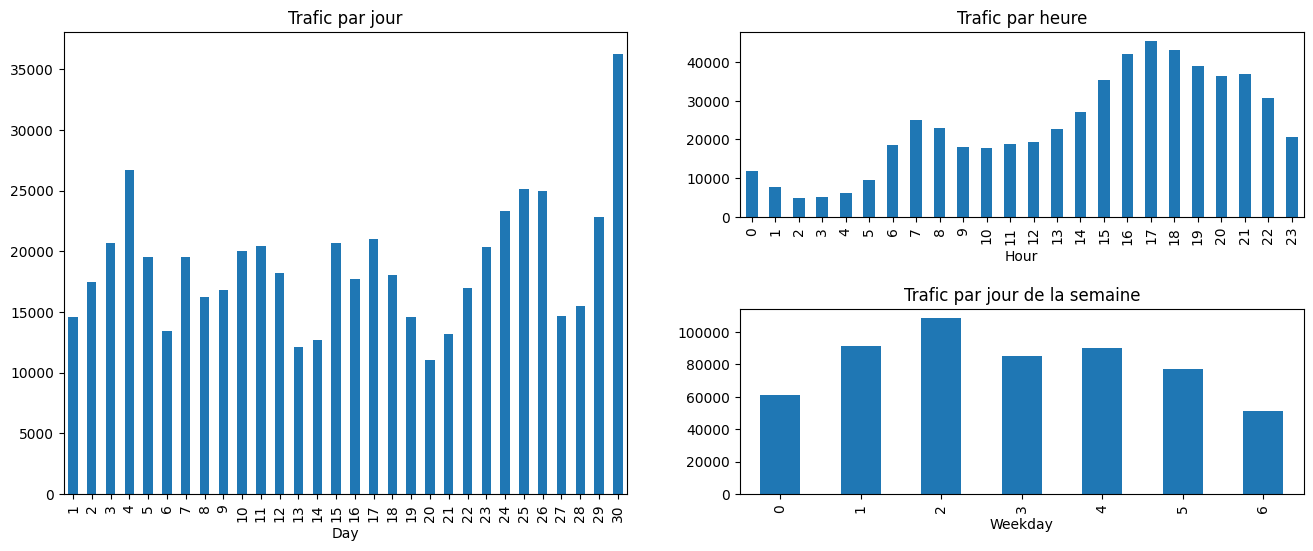

In [22]:
plt.figure(figsize= (16, 6))
plt.subplot(1, 2, 1)
df_avril.groupby(["Day"]).size().plot(kind='bar', title= "Trafic par jour")
plt.subplot(2, 2, 2)
df_avril.groupby(["Hour"]).size().plot(kind='bar', title= "Trafic par heure")
plt.subplot(2, 2, 4)
plt.gcf().subplots_adjust(hspace = 0.5)
df_avril.groupby(["Weekday"]).size().plot(kind='bar', title= "Trafic par jour de la semaine")
plt.show()

TRAFIC NEW-YORK CITY UBER MAI 2014

<AxesSubplot: title={'center': 'Trafic par jour de la semaine'}, xlabel='Weekday'>

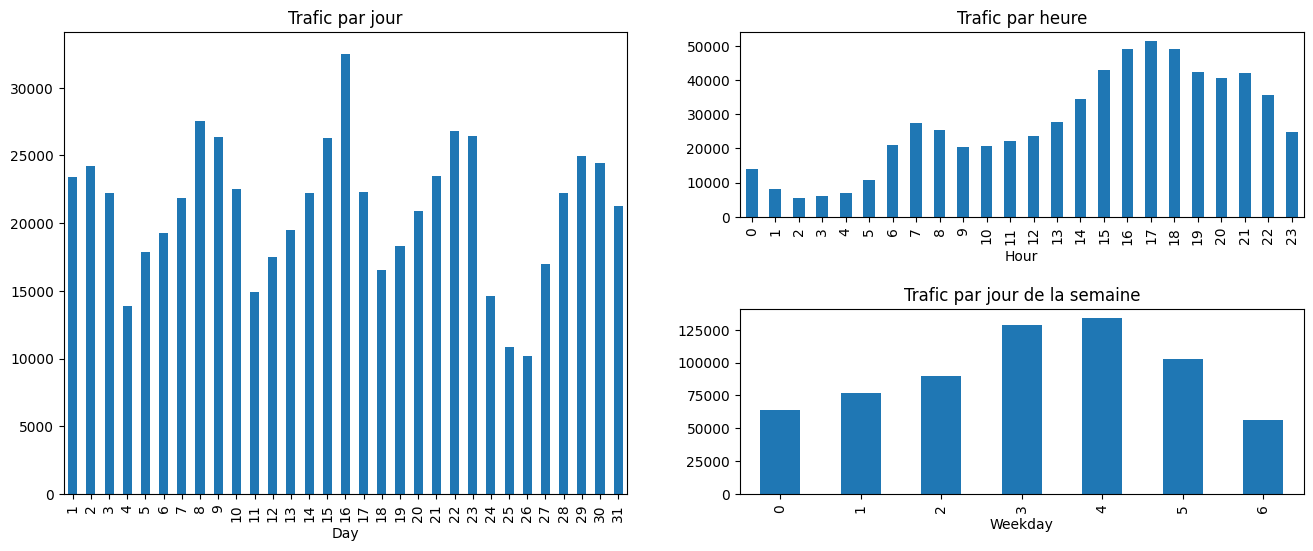

In [23]:
plt.figure(figsize= (16, 6))
plt.subplot(1, 2, 1)
df_mai.groupby(["Day"]).size().plot(kind='bar', title= "Trafic par jour")
plt.subplot(2, 2, 2)
df_mai.groupby(["Hour"]).size().plot(kind='bar', title= "Trafic par heure")
plt.subplot(2, 2, 4)
plt.gcf().subplots_adjust(hspace = 0.5)
df_mai.groupby(["Weekday"]).size().plot(kind='bar', title= "Trafic par jour de la semaine")

TRAFIC NEW-YORK CITY UBER JUIN 2014

<AxesSubplot: title={'center': 'Trafic par jour de la semaine'}, xlabel='Weekday'>

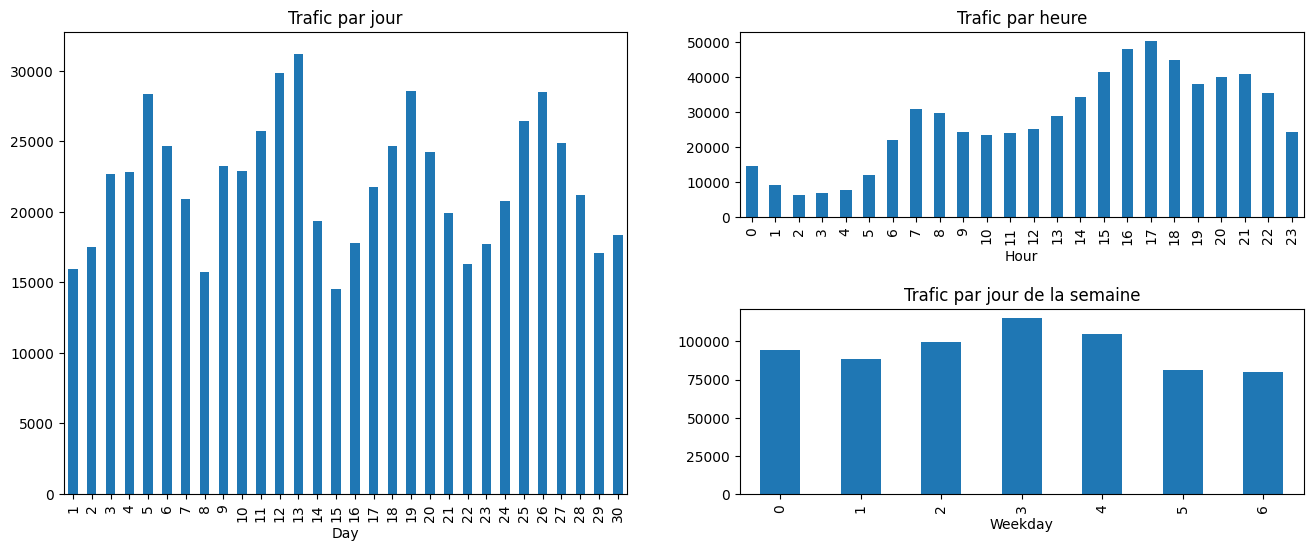

In [8]:
plt.figure(figsize= (16, 6))
plt.subplot(1, 2, 1)
df_juin.groupby(["Day"]).size().plot(kind='bar', title= "Trafic par jour")
plt.subplot(2, 2, 2)
df_juin.groupby(["Hour"]).size().plot(kind='bar', title= "Trafic par heure")
plt.subplot(2, 2, 4)
plt.gcf().subplots_adjust(hspace = 0.5)
df_juin.groupby(["Weekday"]).size().plot(kind='bar', title= "Trafic par jour de la semaine")

TRAFIC NEW-YORK CITY UBER JUILLET 2014

<AxesSubplot: title={'center': 'Trafic par jour de la semaine'}, xlabel='Weekday'>

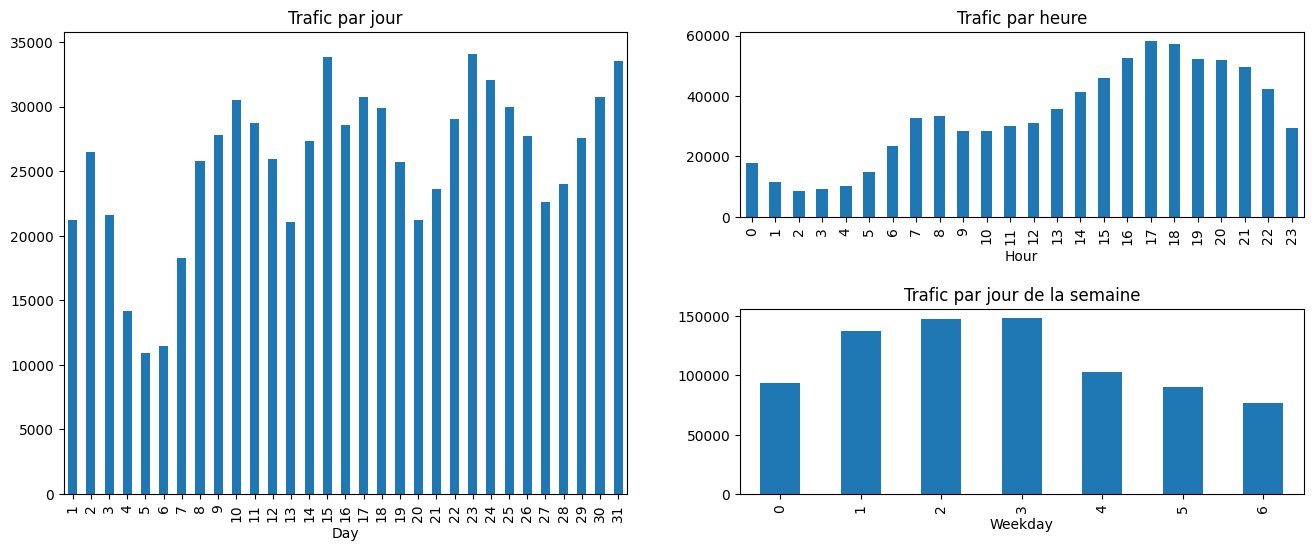

In [9]:
plt.figure(figsize= (16, 6))
plt.subplot(1, 2, 1)
df_juillet.groupby(["Day"]).size().plot(kind='bar', title= "Trafic par jour")
plt.subplot(2, 2, 2)
df_juillet.groupby(["Hour"]).size().plot(kind='bar', title= "Trafic par heure")
plt.subplot(2, 2, 4)
plt.gcf().subplots_adjust(hspace = 0.5)
df_juillet.groupby(["Weekday"]).size().plot(kind='bar', title= "Trafic par jour de la semaine")

TRAFIC NEW-YORK CITY UBER AOUT 2014

<AxesSubplot: title={'center': 'Trafic par jour de la semaine'}, xlabel='Weekday'>

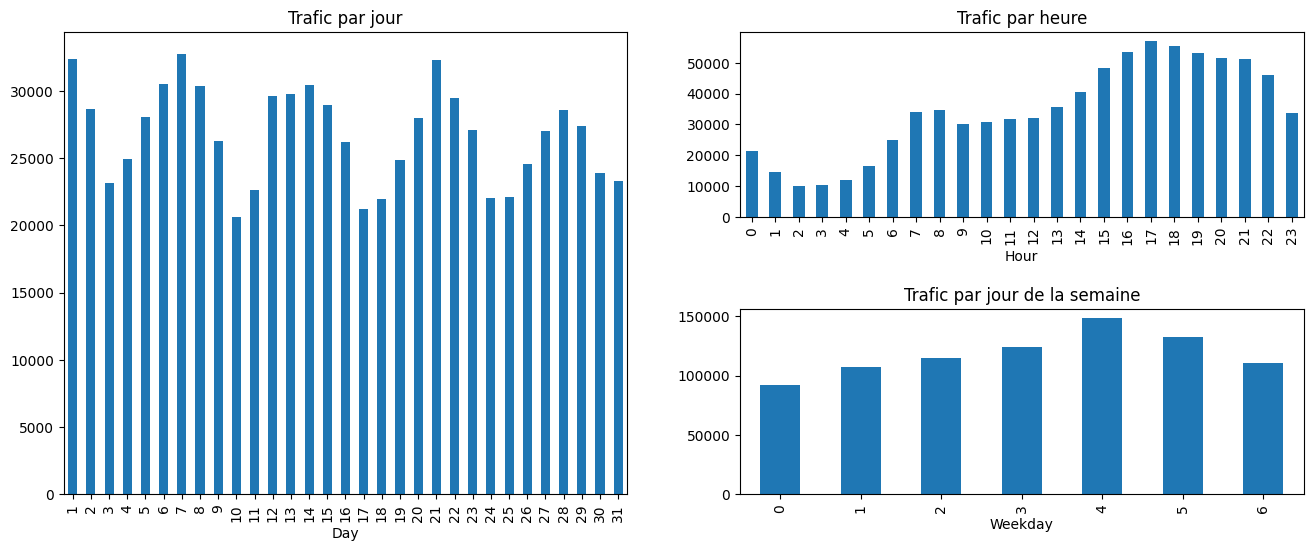

In [10]:
plt.figure(figsize= (16, 6))
plt.subplot(1, 2, 1)
df_aout.groupby(["Day"]).size().plot(kind='bar', title= "Trafic par jour")
plt.subplot(2, 2, 2)
df_aout.groupby(["Hour"]).size().plot(kind='bar', title= "Trafic par heure")
plt.subplot(2, 2, 4)
plt.gcf().subplots_adjust(hspace = 0.5)
df_aout.groupby(["Weekday"]).size().plot(kind='bar', title= "Trafic par jour de la semaine")

TRAFIC NEW-YORK CITY UBER SEPTEMBRE 2014

<AxesSubplot: title={'center': 'Trafic par jour de la semaine'}, xlabel='Weekday'>

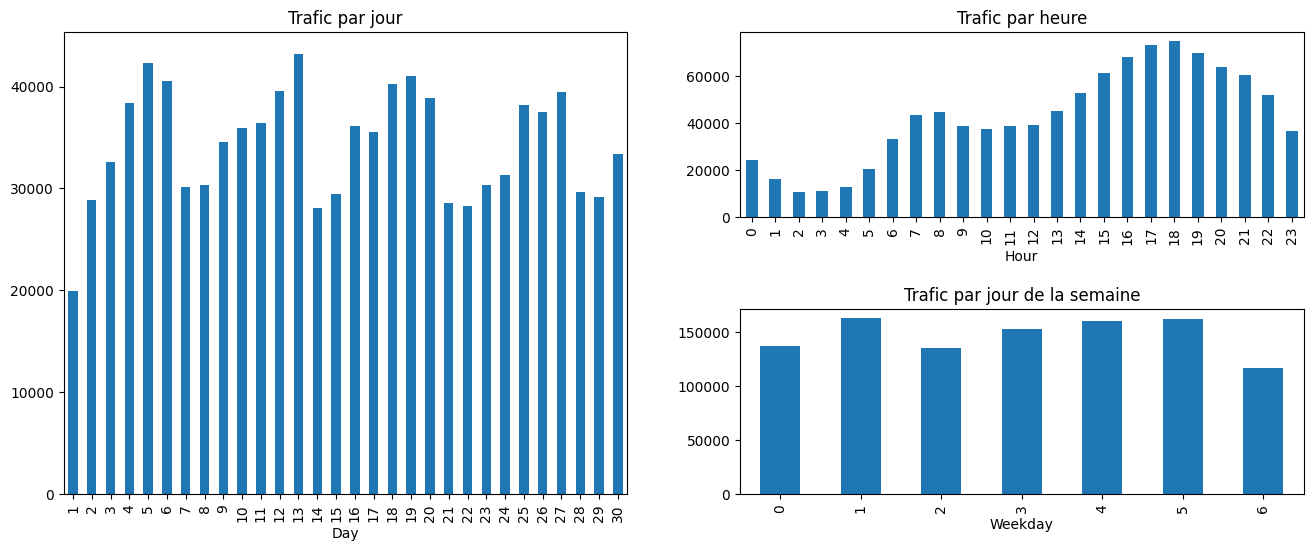

In [11]:
plt.figure(figsize= (16, 6))
plt.subplot(1, 2, 1)
df_septembre.groupby(["Day"]).size().plot(kind='bar', title= "Trafic par jour")
plt.subplot(2, 2, 2)
df_septembre.groupby(["Hour"]).size().plot(kind='bar', title= "Trafic par heure")
plt.subplot(2, 2, 4)
plt.gcf().subplots_adjust(hspace = 0.5)
df_septembre.groupby(["Weekday"]).size().plot(kind='bar', title= "Trafic par jour de la semaine")

In [12]:
# drop useless columns for Machine learnings
df= df.drop(columns=['Base', 'Month', 'Day'])

In [13]:
df.to_csv('src/uber_clean.csv', index=False)

In [14]:
df_avril.to_csv('src/uber_avril.csv', index=False)